In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\accre-pumpkin-pie


In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
jobs = pd.read_csv("data/fullsample.csv")
jobs.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
#"%Y/%m/%d %H:%M:%S"

In [5]:
jobs = pd.read_csv("data/fullsample.csv", usecols=['STATE','END','EXITCODE'])

In [6]:
#jobs_filtered = jobs[(jobs['STATE'] == 'COMPLETED') | (jobs['STATE'] == 'FAILED')].copy()

In [7]:
jobs_filtered = jobs[(jobs['STATE'] == 'COMPLETED') | (jobs['STATE'] == 'FAILED')].copy()

In [8]:
jobs_filtered['END'] = jobs_filtered['END'].str.replace('T', ' ')
jobs_filtered['END'] = pd.to_datetime(jobs_filtered['END'], format = "%Y-%m-%d %H:%M:%S")
jobs_filtered.head(5)

,STATE,END,EXITCODE
1,COMPLETED,2021-09-05 11:36:32,0:0
2,COMPLETED,2021-09-05 19:04:53,0:0
3,COMPLETED,2021-09-07 20:52:55,0:0
4,COMPLETED,2021-09-10 16:45:24,0:0
5,COMPLETED,2021-09-06 16:17:34,0:0


In [9]:
user_ninety_two_oh_four_failures = pd.read_csv('data/final_log_csv.csv')
user_ninety_two_oh_four_failures['DateTime'] = pd.to_datetime(user_ninety_two_oh_four_failures['Date'] + ' ' + user_ninety_two_oh_four_failures['Time'])
user_ninety_two_oh_four_failures = user_ninety_two_oh_four_failures.drop(columns = 'Unnamed: 0')
user_ninety_two_oh_four_failures

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
0,2020-10-18,06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:16:25
1,2020-10-18,06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:38:44
2,2020-10-18,06:53:44,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:53:44
3,2020-10-18,06:54:04,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:54:04
4,2020-10-18,07:47:25,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 07:47:25
...,...,...,...,...,...,...,...,...,...
3291,2021-09-24,18:14:35,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 18:14:35
3292,2021-09-24,19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 19:13:14
3293,2021-10-02,08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 08:14:16
3294,2021-10-02,18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 18:29:08


In [10]:
user_ninety_two_oh_four_failures['Date'].value_counts()

Date
2020-12-04    145
2020-12-02    108
2020-12-09    102
2021-01-01     92
2020-12-05     79
             ... 
2021-03-02      1
2021-08-20      1
2021-08-21      1
2020-11-13      1
2021-10-06      1
Name: count, Length: 235, dtype: int64

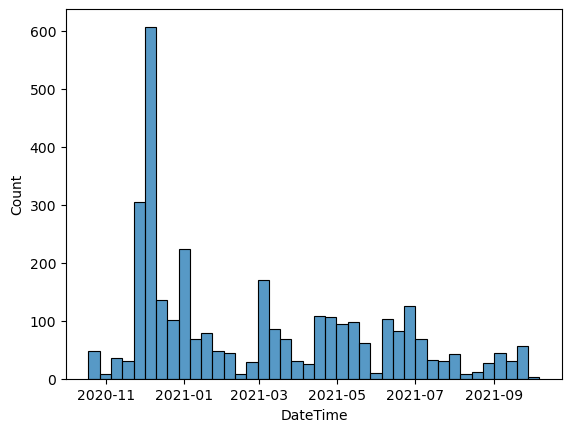

In [11]:
sns.histplot(data =user_ninety_two_oh_four_failures, x='DateTime', bins=40)
plt.show()

In [29]:
jobs_filtered['END'].dt.date.head()

AttributeError: 'Series' object has no attribute 'date'

In [51]:
# High failures seen for 9204 between 2020-12-02 and 2021-01-01
start_date = pd.to_datetime('2020-12-02').date()
end_time = pd.to_datetime('2021-01-10').date()

high_failures_df = jobs_filtered[(jobs_filtered['END'].dt.date >= start_date) & (jobs_filtered['END'].dt.date <= end_time)].reset_index(drop=True)

In [53]:
high_failures_df.head(2)

,STATE,END,EXITCODE
0,COMPLETED,2021-01-02 22:28:39,0:0
1,COMPLETED,2021-01-02 23:12:11,0:0


In [55]:
high_failures_df['STATE'].value_counts()

STATE
COMPLETED    524555
FAILED          226
Name: count, dtype: int64

In [57]:
high_failures_df['EXITCODE'].value_counts()

EXITCODE
0:0      524555
1:0         199
2:0           6
59:0          5
29:0          5
127:0         2
9:0           2
38:0          2
76:0          1
7:0           1
24:0          1
30:0          1
13:0          1
Name: count, dtype: int64